# P1 - Time Series Analysis

Due date: July 18, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday July 11th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Sunday, July 11, 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

In [3]:
import pandas as pd
import holidays_co
import matplotlib.pyplot as plt

In [122]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)


In [4]:
df = pd.read_csv('../datasets/dataset_proyecto1.zip')

In [5]:
df.head()
df.columns

Index(['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand',
       'lastPrice', 'Price', 'stock', 'available_stock', 'city',
       'CAT_ACCESORIOS', 'CAT_EXPOPET', 'CAT_SNACKS', 'CAT_MEDICINAS',
       'CAT_CUIDADO_E_HIGIENE', 'CAT_JUGUETES', 'CAT_ALIMENTO_PRESCRIPCION',
       'CAT_HIGIENE', 'CAT_REGALOS', 'CAT_PARA_PETLOVERS', 'CAT_FARMAPET',
       'CAT_PREMIOS', 'CAT_VETERINARIOS', 'CAT_ALIMENTO', 'CAT_COMBOS',
       'CAT_ARENAS'],
      dtype='object')

In [6]:
df['ALIMENTOS'] = (df.CAT_SNACKS + df.CAT_ALIMENTO_PRESCRIPCION + df.CAT_ALIMENTO) >= 1
df['ALIMENTOS'] = df.ALIMENTOS.astype('int')
df.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,...,CAT_HIGIENE,CAT_REGALOS,CAT_PARA_PETLOVERS,CAT_FARMAPET,CAT_PREMIOS,CAT_VETERINARIOS,CAT_ALIMENTO,CAT_COMBOS,CAT_ARENAS,ALIMENTOS
0,2020-08-17T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
1,2020-08-18T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
2,2020-08-19T00:00:00.000Z,1,9953,2,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
3,2020-08-20T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
4,2020-08-21T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df = df[['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand', 
         'lastPrice', 'Price', 'stock', 'available_stock', 'city', 'ALIMENTOS']]

In [8]:
df_alimentos = df[df.ALIMENTOS == 1]
df_no_alimentos = df[df.ALIMENTOS == 0]
print( df.shape ) 
print( df_alimentos.shape ) 
print( df_no_alimentos.shape ) 

(2286885, 11)
(1423388, 11)
(863497, 11)


In [9]:
df_alimentos.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,ALIMENTOS
330,2020-08-17T00:00:00.000Z,1,10642,0,0,3299.0,3299.0,266.0,1.0,Bogota,1
331,2020-08-18T00:00:00.000Z,1,10642,16,2,3299.0,3299.0,266.0,1.0,Bogota,1
332,2020-08-19T00:00:00.000Z,1,10642,5,0,3299.0,3299.0,266.0,1.0,Bogota,1
333,2020-08-20T00:00:00.000Z,1,10642,20,0,3299.0,3299.0,266.0,1.0,Bogota,1
334,2020-08-21T00:00:00.000Z,1,10642,2,0,3299.0,3299.0,266.0,1.0,Bogota,1


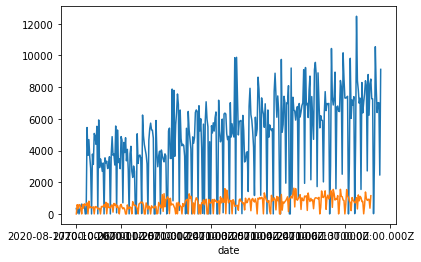

In [10]:
df_alimentos.groupby('date')['demand'].sum().plot()
df_no_alimentos.groupby('date')['demand'].sum().plot()

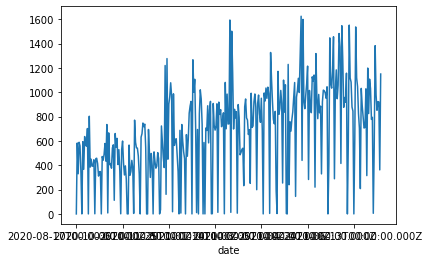

In [11]:
df_no_alimentos.groupby('date')['demand'].sum().plot()

In [12]:
df_alimentos.date = pd.to_datetime(df_alimentos.date)
df_alimentos = df_alimentos.dropna()

E:\Users\juanb\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


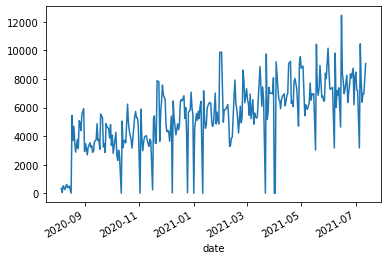

In [14]:
df_alimentos_sin_fds = df_alimentos[ ~df_alimentos.date.dt.weekday.isin([6]) ]
df_alimentos_sin_fds.groupby('date')['demand'].sum().plot()

In [15]:
df_alimentos_sin_fds.date.dt.weekday.value_counts()

0    202132
5    199133
4    198486
3    197832
2    197264
1    196644
Name: date, dtype: int64

In [16]:
pd.date_range(start = df_alimentos.date.min(), 
              end = df_alimentos.date.max() ).difference(df_alimentos.date)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [17]:
df_alimentos.date.min()
df_alimentos.date.max()

Timestamp('2021-07-12 00:00:00+0000', tz='UTC')

In [192]:
festivos = [ x[0] for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]

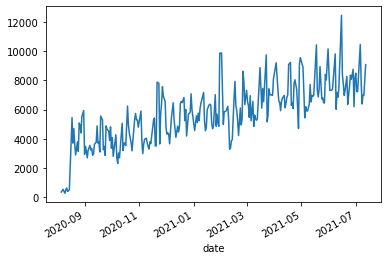

In [19]:
df_alimentos_sin_fds_ni_festivos = df_alimentos_sin_fds[ ~df_alimentos_sin_fds.date.isin( festivos ) ]
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

In [188]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [189]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

Results of Dickey-Fuller Test:
Test Statistic                  -3.353235
p-value                          0.012660
#Lags Used                       5.000000
Number of Observations Used    269.000000
Critical Value (1%)             -3.454896
Critical Value (5%)             -2.872345
Critical Value (10%)            -2.572528
dtype: float64


E:\Users\juanb\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


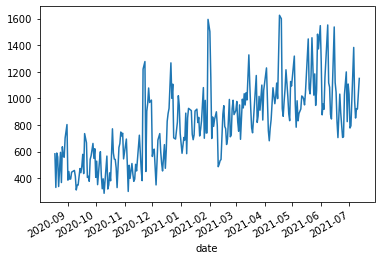

In [20]:
df_no_alimentos.date = pd.to_datetime(df_no_alimentos.date)
df_no_alimentos_sin_fds = df_no_alimentos[ ~df_no_alimentos.date.dt.weekday.isin([6]) ]
df_no_alimentos_sin_fds_ni_festivos = df_no_alimentos_sin_fds[ ~df_no_alimentos_sin_fds.date.isin( festivos ) ]
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

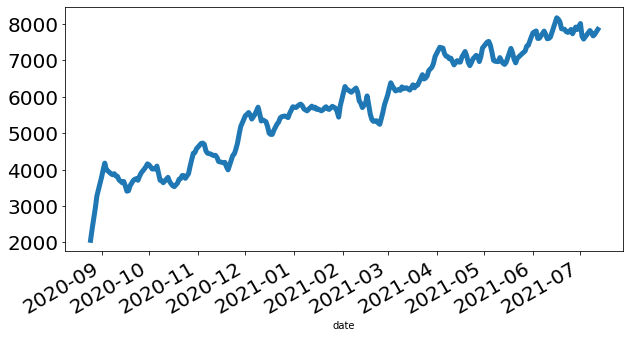

In [182]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().rolling(15).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

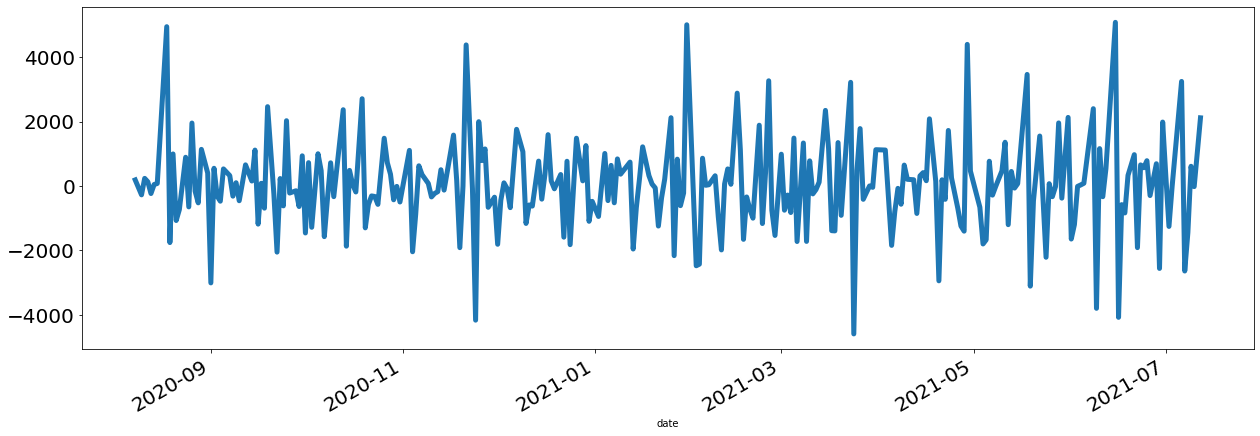

In [183]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff().plot(figsize=(21,7), linewidth=5, fontsize=20)

In [191]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff()[1:])

Results of Dickey-Fuller Test:
Test Statistic                -7.323450e+00
p-value                        1.177671e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.580000e+02
Critical Value (1%)           -3.455953e+00
Critical Value (5%)           -2.872809e+00
Critical Value (10%)          -2.572775e+00
dtype: float64


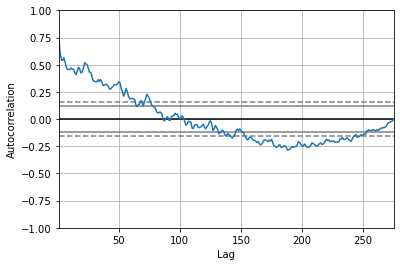

In [184]:
pd.plotting.autocorrelation_plot(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

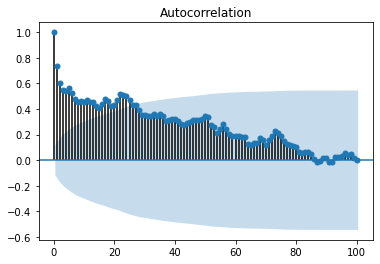

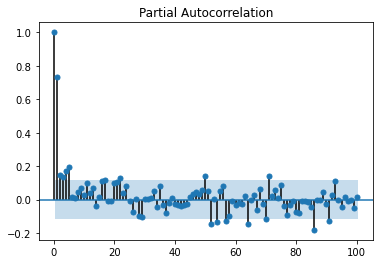

In [185]:
plot_acf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);
plot_pacf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);

In [165]:
from statsmodels.tsa.arima_model import ARIMA

series = df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:               D.demand   No. Observations:                  274
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2340.639
Method:                       css-mle   S.D. of innovations           1239.287
Date:                Sun, 18 Jul 2021   AIC                           4695.279
Time:                        19:31:33   BIC                           4720.571
Sample:                             1   HQIC                          4705.430
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.6480     28.331      0.976      0.329     -27.881      83.177
ar.L1.D.demand    -0.4662      0.060     -7.746      0.000      -0.584      -0.348
ar.L2.D.demand    -0.4213      0.064

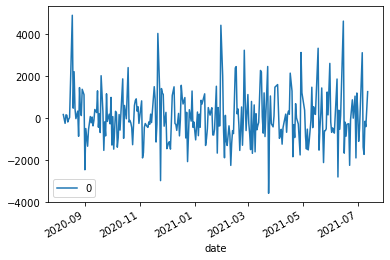

In [166]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

        predict   real
0   7209.842068   5429
1   7521.299046   6197
2   7764.762190   5913
3   7754.045613   5893
4   7701.297990   6361
5   7686.017137   7718
6   7712.633750   6517
7   7745.911421   6967
8   7771.152545   6901
9   7790.156423   6973
10  7808.978140  10435
11  7829.753057   7326
12  7851.690497   6866
13  7873.654267   7394
14  7895.315133   8944
15  7916.844850   6731
16  7938.424548   6802
17  7960.083444   6470
18  7981.775111   6452
19  8003.464099   8409
20  8025.145341   8031
21  8046.826114  10159
22  8068.510793   8512
23  8090.198705   7314
24  8111.887758   7301
25  8133.576866   7333
26  8155.265976   7417
27  8176.955288   9816
28  8198.644847   6019
29  8220.334563   7179
30  8242.024345   6846
31  8263.714152   7385
32  8285.403981  12464
33  8307.093830   8387
34  8328.783696   7808
35  8350.473572   6971
36  8372.163454   7300
37  8393.853338   8272
38  8415.543225   6358
39  8437.233114   7012
40  8458.923003   7579
41  8480.612894   8363
42  8502.30

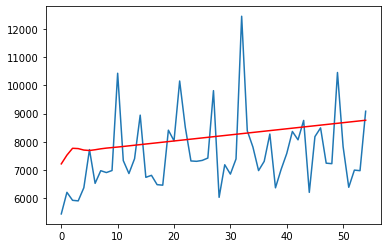

In [177]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(4,1,2))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [168]:
from sklearn.metrics import mean_absolute_error

In [169]:
mean_absolute_error(test, predictions)

1145.4579245747766

In [170]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Iterando
results = []
for p in range(1,9):        
    for d in range(0,4):                
        for q in range(1,6):
            
            try:                
                # Create and fit ARMA(p,q) model
                X = series.values
                size = int(len(X) * 0.66)
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                future = [x for x in test]

                model = ARIMA(history, order=(p,d,q))
                model_fit = model.fit(disp=0)
                output = model_fit.forecast(steps=len(test))[0]
                yhat = output
                predictions = yhat
                real_values = future
                error = mean_squared_error(test, predictions)

                # Print p, q, AIC, BIC
                #print(p, d, q, 'Test MSE: %.3f' % error) 
                results.append([p,d,q,error])
                
            except:
                #print(p, d, q, None )
                results.append([p,d,q,None])
                
df = pd.DataFrame(results,columns=['p','d','q','mse'])

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: invalid value encou

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-packages\sta

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-package

In [171]:
df.loc[df['mse'] == df['mse'].min()]

,p,d,q,mse
66,4,1,2,1.561816e+06


In [172]:
df['mse'].min()

1561815.6574394756

In [178]:
from pmdarima.arima import auto_arima

In [179]:
model = auto_arima(history, X=None, start_p=1, d=None, start_q=1, max_p=5, max_d=1, max_q=5)
model_fit = model.fit(history)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1861.111
Date:                Sun, 18 Jul 2021   AIC                           3728.223
Time:                        19:34:55   BIC                           3738.390
Sample:                             0   HQIC                          3732.329
                                - 220                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4514      0.083      5.467      0.000       0.290       0.613
ma.L1         -0.9197      0.045    -20.564      0.000      -1.007      -0.832
sigma2      1.402e+06   9.25e+04     15.157      0.000    1.22e+06    1.58e+06
===================================================================================
Ljung-Box (Q):                       24.05   Jarque-Bera (JB):                61.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.83
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

        predict   real
0   7225.567927   5429
1   7282.254018   6197
2   7307.844254   5913
3   7319.396650   5893
4   7324.611836   6361
5   7326.966168   7718
6   7328.029002   6517
7   7328.508805   6967
8   7328.725406   6901
9   7328.823188   6973
10  7328.867331  10435
11  7328.887258   7326
12  7328.896254   6866
13  7328.900316   7394
14  7328.902149   8944
15  7328.902977   6731
16  7328.903350   6802
17  7328.903519   6470
18  7328.903595   6452
19  7328.903629   8409
20  7328.903645   8031
21  7328.903652  10159
22  7328.903655   8512
23  7328.903656   7314
24  7328.903657   7301
25  7328.903657   7333
26  7328.903658   7417
27  7328.903658   9816
28  7328.903658   6019
29  7328.903658   7179
30  7328.903658   6846
31  7328.903658   7385
32  7328.903658  12464
33  7328.903658   8387
34  7328.903658   7808
35  7328.903658   6971
36  7328.903658   7300
37  7328.903658   8272
38  7328.903658   6358
39  7328.903658   7012
40  7328.903658   7579
41  7328.903658   8363
42  7328.90

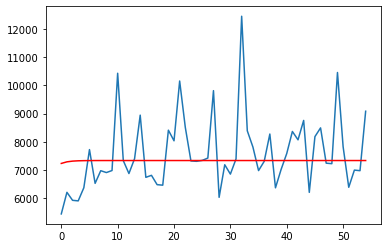

In [180]:
output = model_fit.predict(len(test))
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [181]:
mean_absolute_error(test, predictions)

921.2200032606921

In [107]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

In [108]:
df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


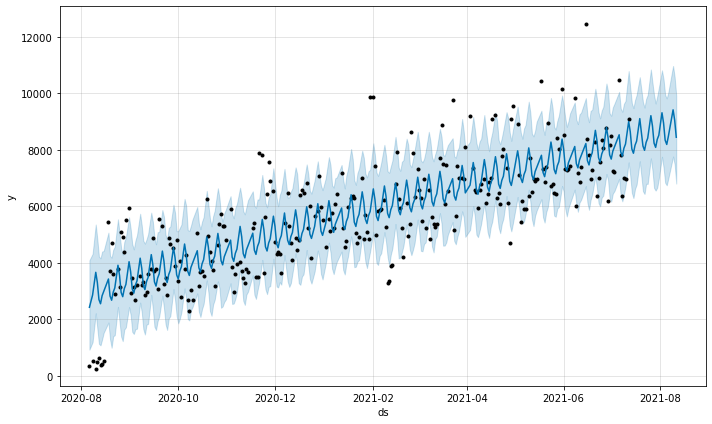

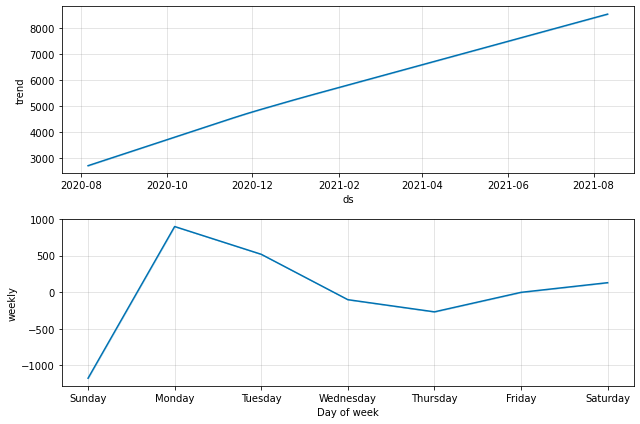

In [109]:
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[ ~future.ds.dt.weekday.isin([6]) ]
future = future[ ~future.ds.isin( festivos ) ]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [110]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(m, initial='60 days', period='6 days', horizon = '120 days')

INFO:prophet:Making 27 forecasts with cutoffs between 2020-10-09 00:00:00 and 2021-03-14 00:00:00


In [111]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,12 days,1.646610e+06,1283.202858,1037.041904,0.207057,0.172060,0.189431,0.804389
1,13 days,1.646401e+06,1283.121426,1034.833958,0.205458,0.170738,0.188064,0.810028
2,14 days,1.651671e+06,1285.173450,1034.698281,0.205314,0.166057,0.187843,0.809160
3,15 days,1.655420e+06,1286.631214,1036.550581,0.204586,0.165722,0.187329,0.790770
4,16 days,1.670248e+06,1292.380707,1039.562189,0.205663,0.165722,0.187653,0.779667
...,...,...,...,...,...,...,...,...
104,116 days,3.370477e+06,1835.885915,1552.649780,0.260757,0.208955,0.217685,0.563392
105,117 days,3.388918e+06,1840.901349,1557.058220,0.260469,0.207990,0.217441,0.574013
106,118 days,3.390489e+06,1841.328177,1559.860226,0.260043,0.205834,0.217101,0.576336
107,119 days,3.425883e+06,1850.914051,1571.852703,0.262521,0.207357,0.218690,0.574013


In [112]:
df_p["mae"].mean()

1258.9913031513101

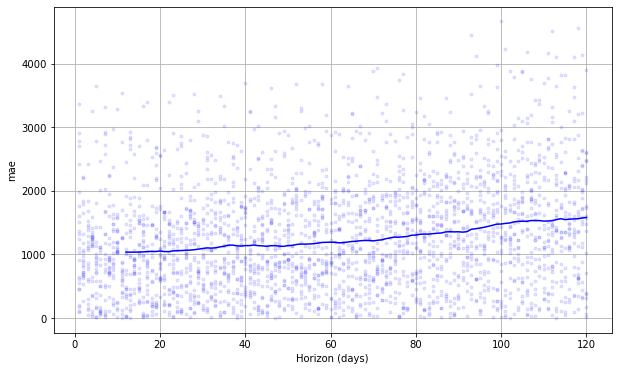

In [113]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [114]:
festivos_col = [ (x[0],x[1]) for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
df_festivos_col = pd.DataFrame( festivos_col, columns=['ds','holiday'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


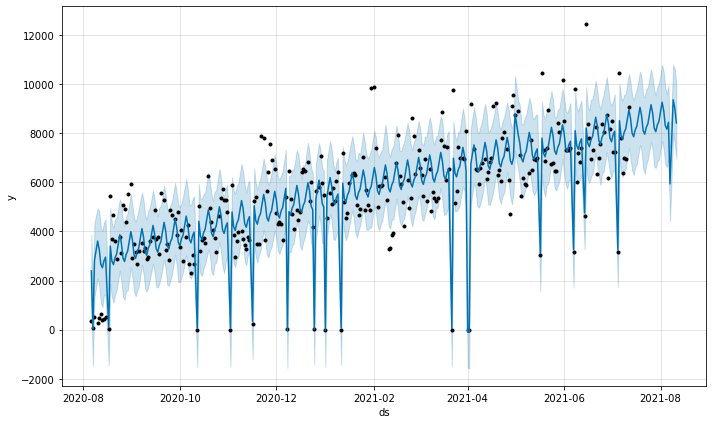

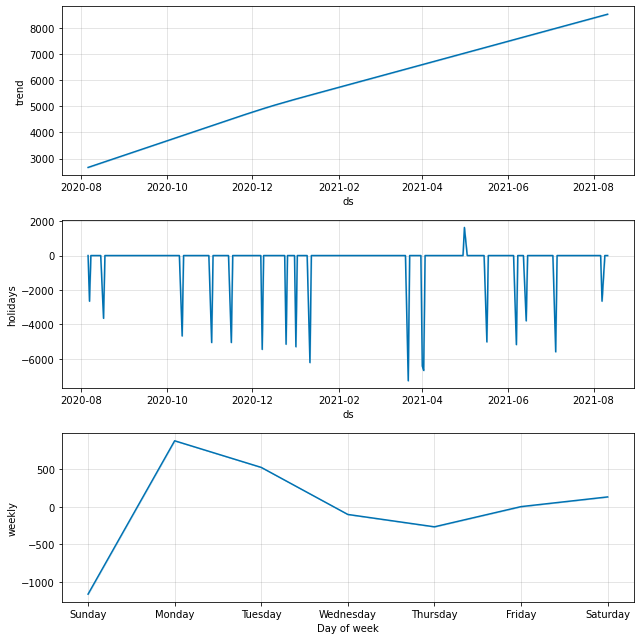

In [115]:
series = df_alimentos_sin_fds.groupby('date')['demand'].sum()

df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

m = Prophet(holidays = df_festivos_col)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[~future.ds.dt.weekday.isin([6])]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [116]:
df_cv = cross_validation(m, initial='60 days', period='6 days', horizon = '120 days')

INFO:prophet:Making 27 forecasts with cutoffs between 2020-10-09 00:00:00 and 2021-03-14 00:00:00


In [117]:
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,12 days,3.260514e+06,1805.689475,1269.642441,0.172639,0.278272,0.762936
1,13 days,3.254640e+06,1804.062125,1266.199518,0.173152,0.276766,0.765343
2,14 days,3.480576e+06,1865.630197,1291.051557,0.172639,0.283070,0.761733
3,15 days,3.394770e+06,1842.490042,1277.823829,0.172452,0.275850,0.758594
4,16 days,3.415625e+06,1848.140949,1280.602448,0.172360,0.276014,0.751530
...,...,...,...,...,...,...,...
104,116 days,5.217789e+06,2284.247990,1740.571709,0.206772,0.266632,0.529116
105,117 days,5.236662e+06,2288.375501,1747.526746,0.206847,0.266723,0.535650
106,118 days,5.250149e+06,2291.320341,1753.861683,0.199673,0.266913,0.534296
107,119 days,5.403925e+06,2324.634450,1781.233201,0.206847,0.271142,0.530686


In [118]:
df_p["mae"].mean()

1506.57463420996

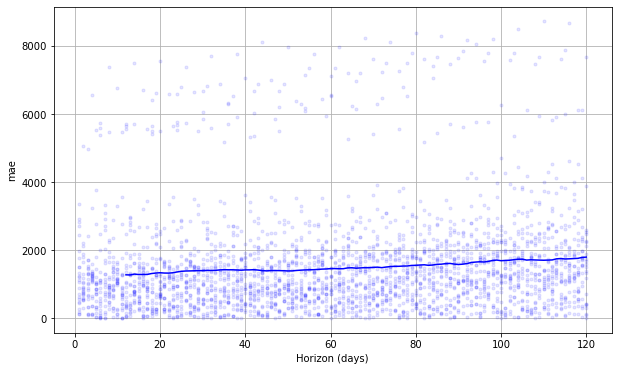

In [119]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

,ds
0,2020-08-06
1,2020-08-07
2,2020-08-08
3,2020-08-10
4,2020-08-11
...,...
316,2021-08-06
317,2021-08-07
319,2021-08-09
320,2021-08-10
